In [1]:
import cv2
import numpy as np
from PIL import Image

In [38]:
img_cv = cv2.imread('big_img.jpg')

In [39]:
def show_cv(img_cv):
    return Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))

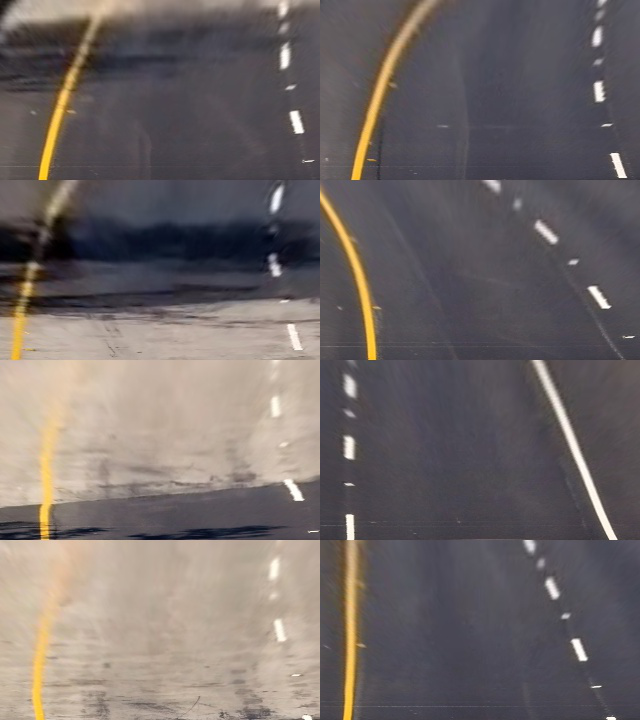

In [40]:
show_cv(img_cv)

In [41]:
img_cvHSV = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)

In [42]:
img_cvHLS = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HLS)

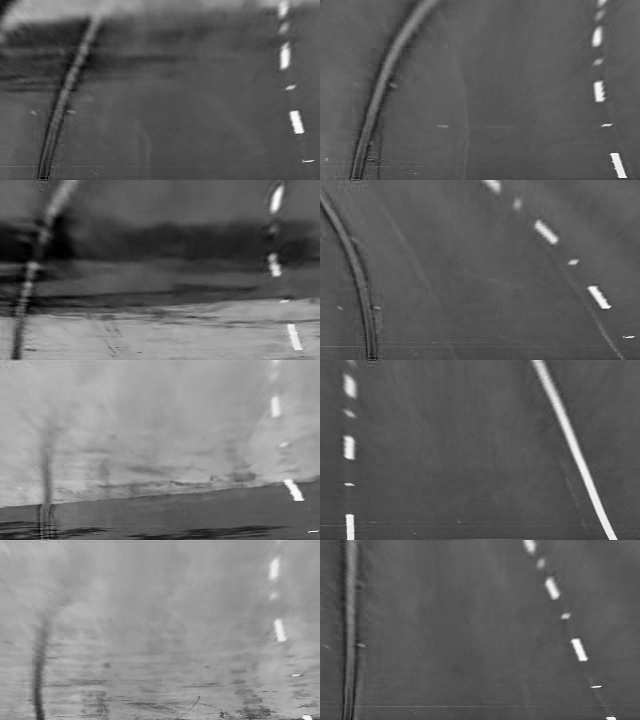

In [43]:
Image.fromarray(img_cv[:,:,0])

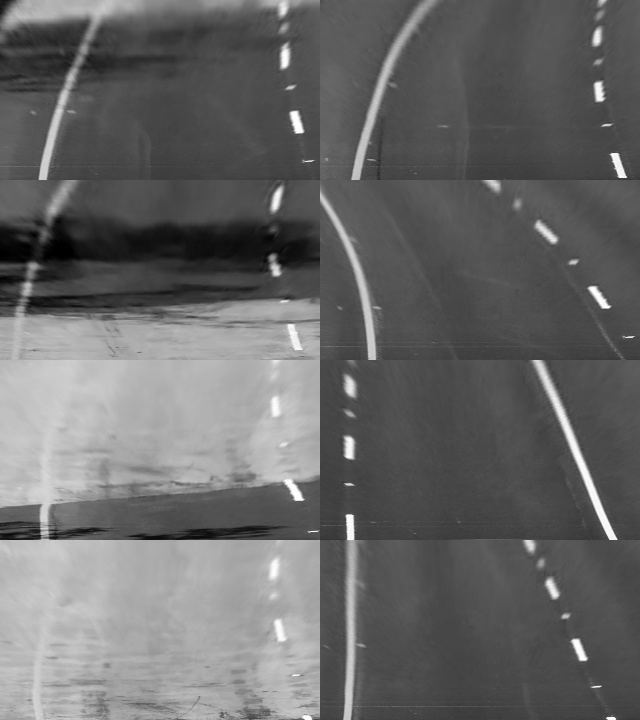

In [44]:
Image.fromarray(img_cv[:,:,1])

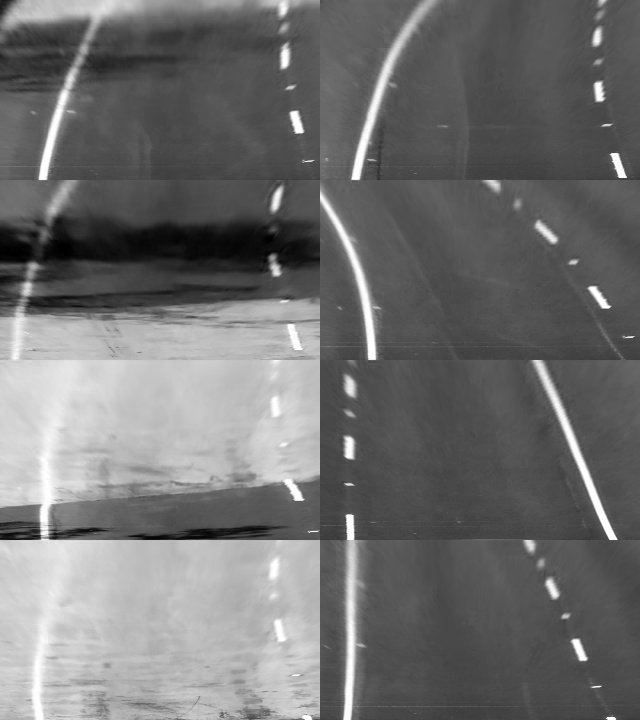

In [45]:
Image.fromarray(img_cv[:,:,2])

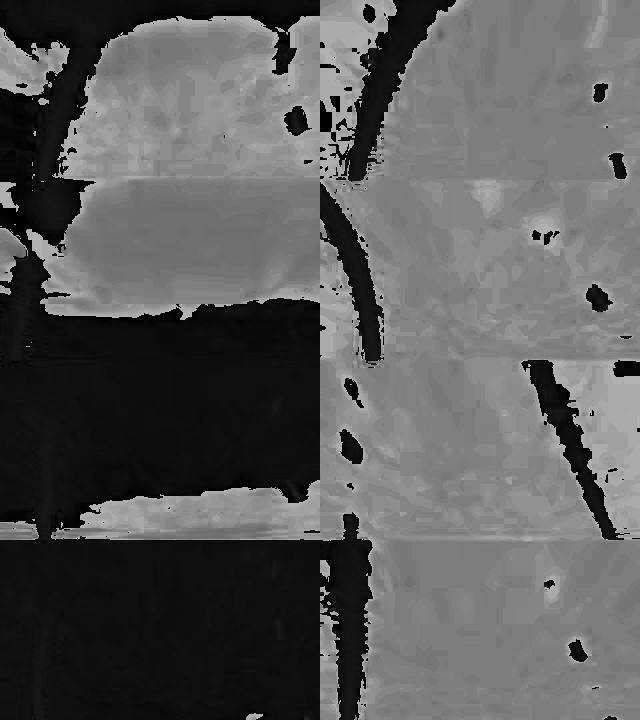

In [46]:
Image.fromarray(img_cvHSV[:,:,0])

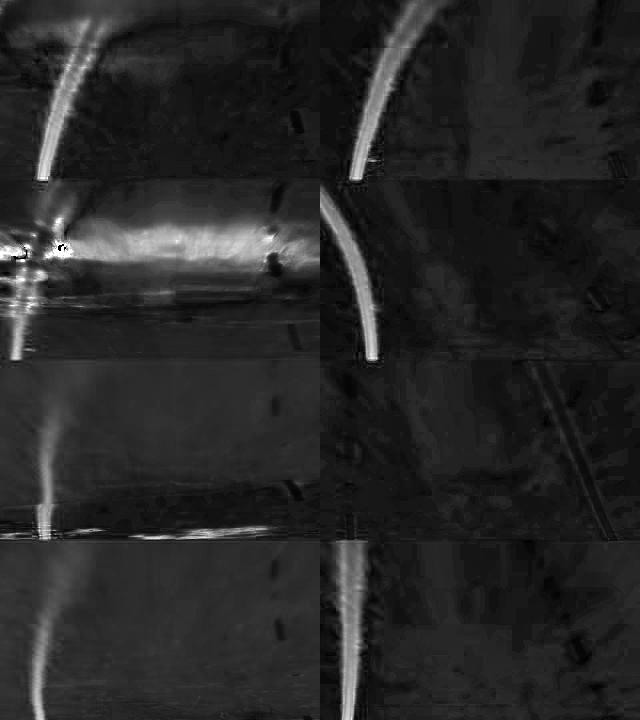

In [47]:
Image.fromarray(img_cvHSV[:,:,1])

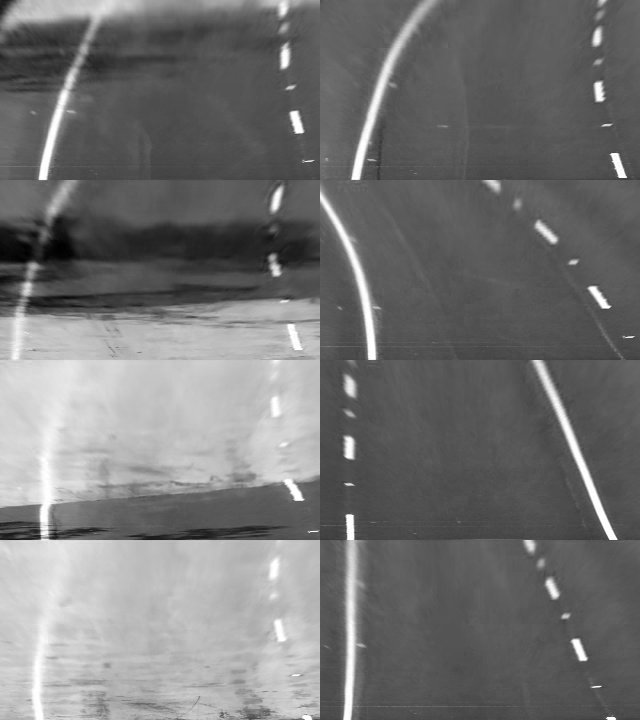

In [48]:
Image.fromarray(img_cvHSV[:,:,2])

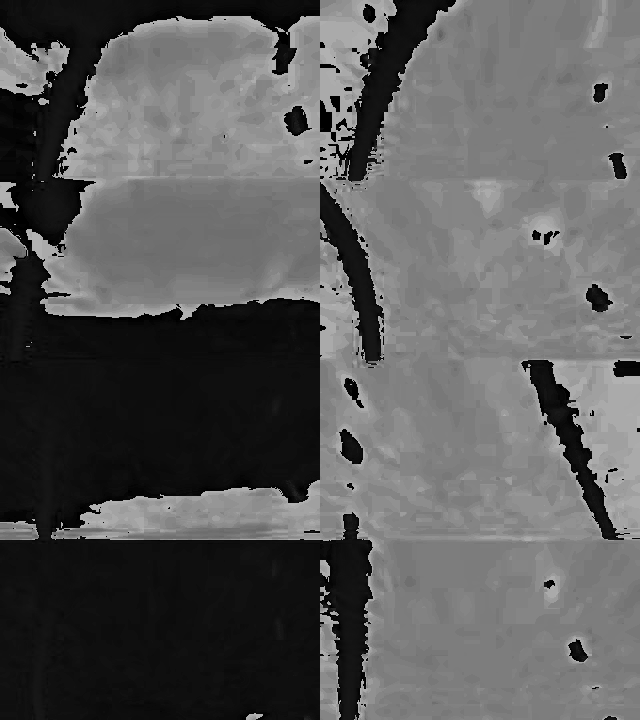

In [49]:
Image.fromarray(img_cvHLS[:,:,0])

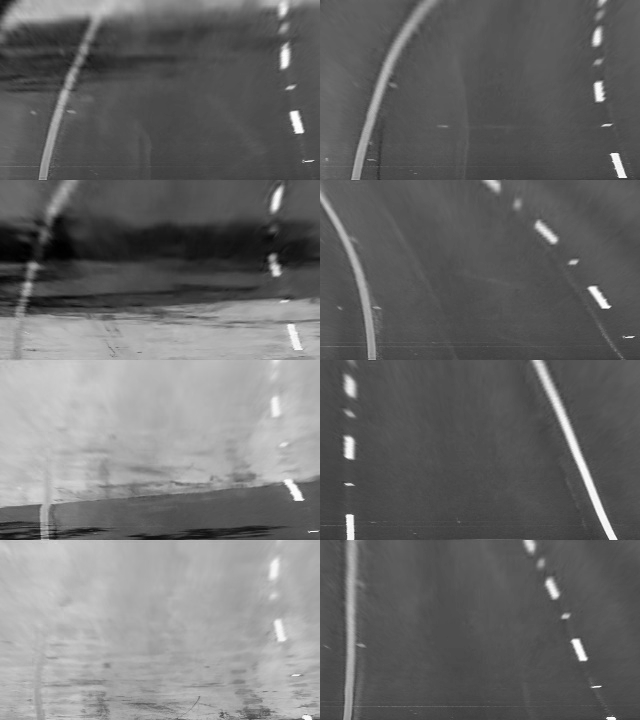

In [50]:
Image.fromarray(img_cvHLS[:,:,1])

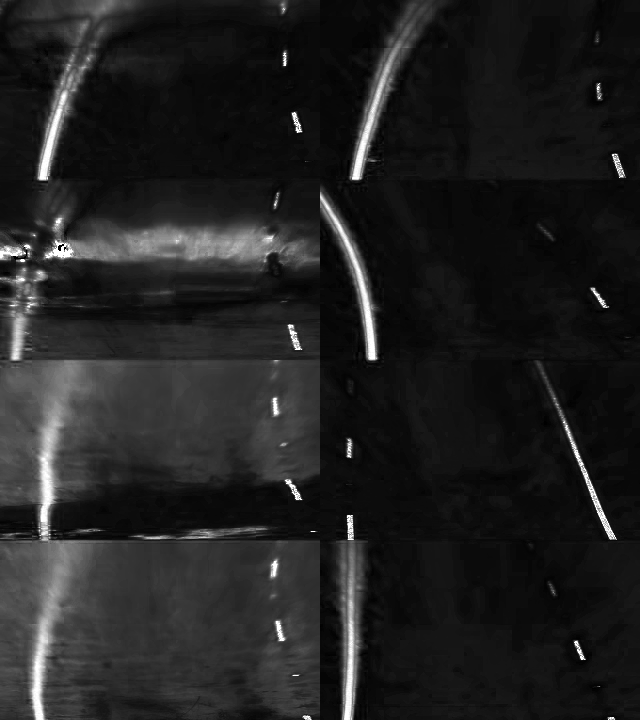

In [51]:
Image.fromarray(img_cvHLS[:,:,2])

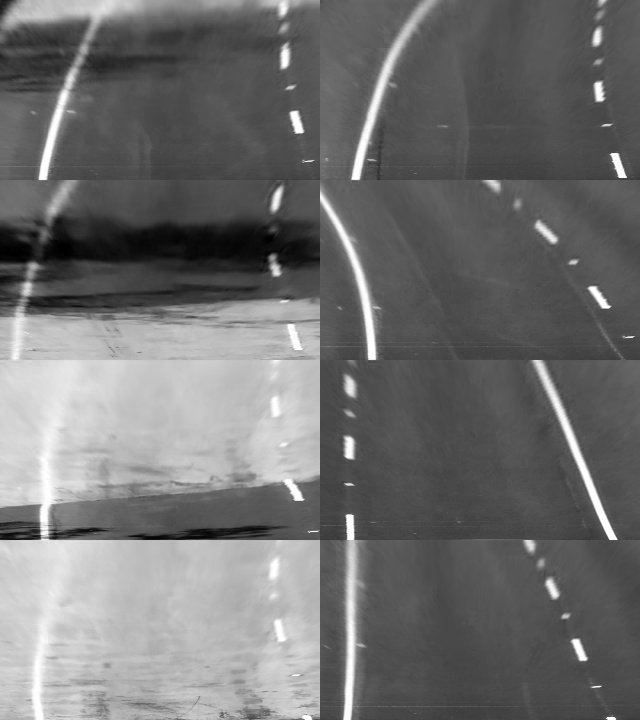

In [52]:
Image.fromarray(img_cv[:,:,2])

In [57]:
sobel_cv = cv2.Sobel(img_cv[:,:,2], cv2.CV_64F, 1, 0)
sobel_cv = np.abs(sobel_cv)
sobel_cv = 255 * (sobel_cv / np.max(sobel_cv))
sobel_cv = np.uint8(sobel_cv)

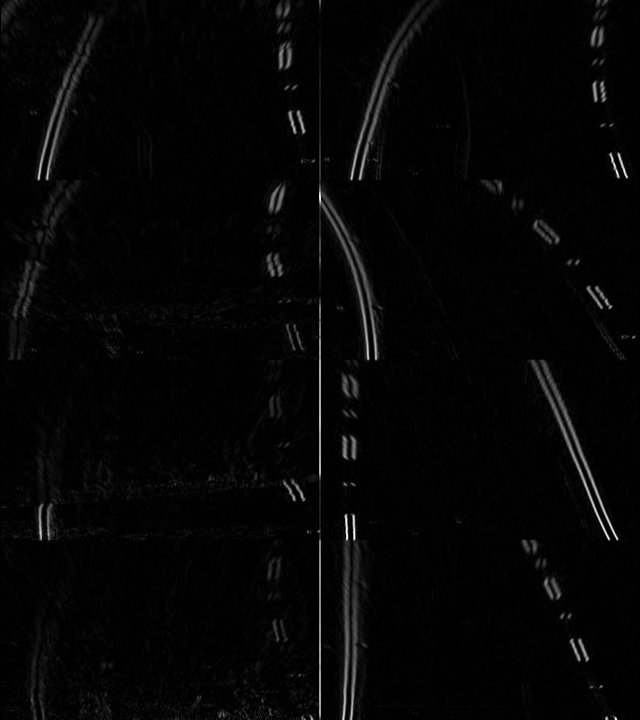

In [58]:
Image.fromarray(sobel_cv)

In [59]:
sobel_cv = cv2.Sobel(img_cv[:,:,2], cv2.CV_64F, 0, 1)
sobel_cv = np.abs(sobel_cv)
sobel_cv = 255 * (sobel_cv / np.max(sobel_cv))
sobel_cv = np.uint8(sobel_cv)

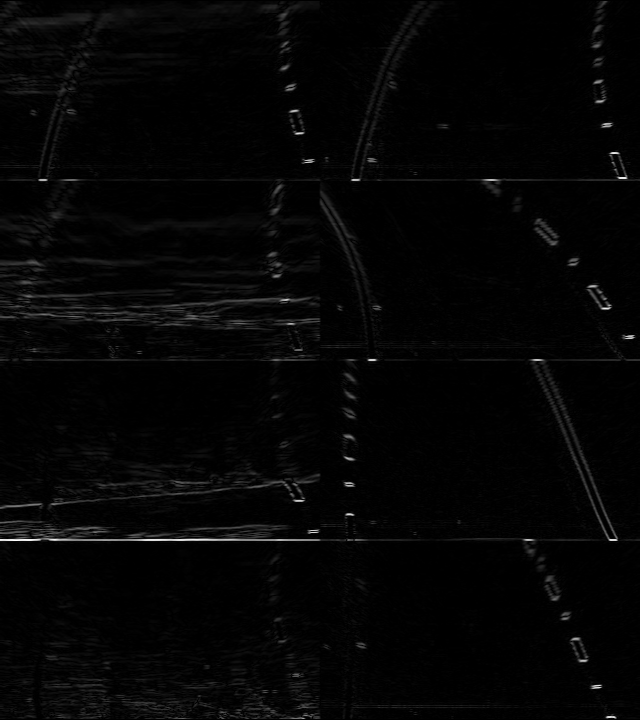

In [60]:
Image.fromarray(sobel_cv)

In [61]:
sobel_cv = cv2.Sobel(img_cvHSV[:,:,1], cv2.CV_64F, 1, 0)
sobel_cv = np.abs(sobel_cv)
sobel_cv = 255 * (sobel_cv / np.max(sobel_cv))
sobel_cv = np.uint8(sobel_cv)

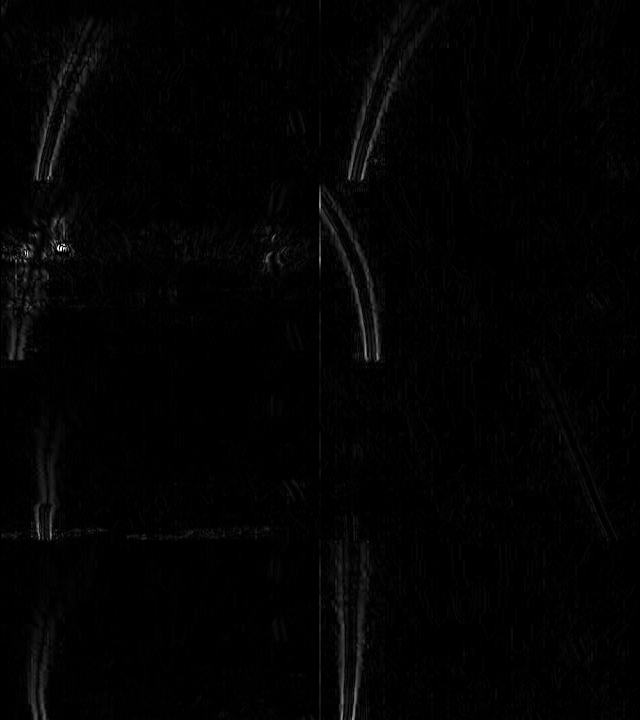

In [62]:
Image.fromarray(sobel_cv)

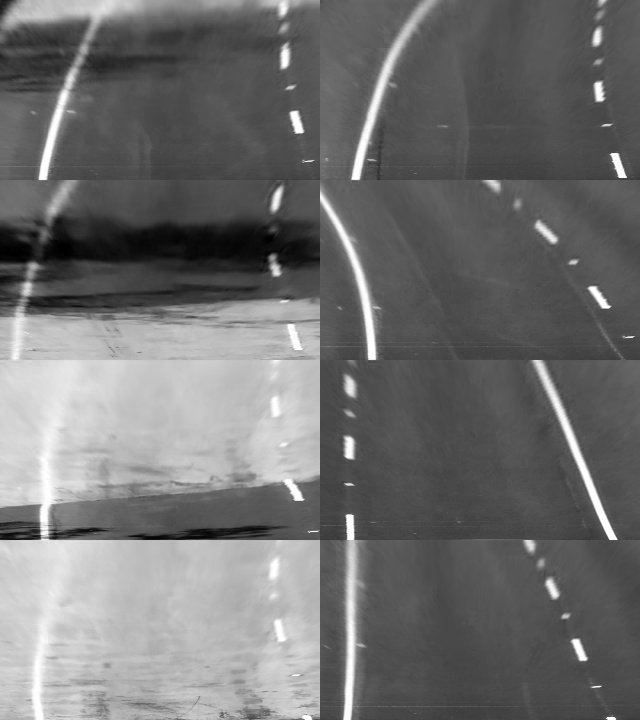

In [63]:
Image.fromarray(img_cv[:,:,2])

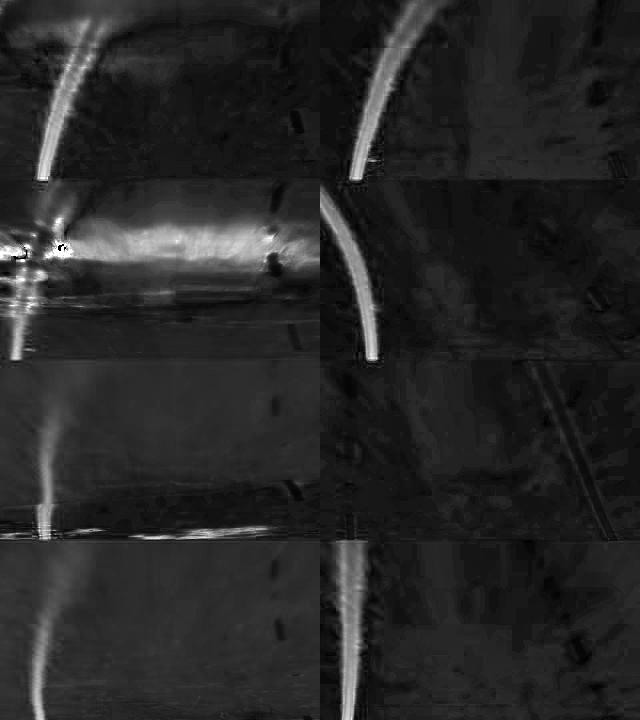

In [65]:
Image.fromarray(img_cvHSV[:,:,1])

In [89]:
th0 = cv2.adaptiveThreshold(img_cv[:,:,2],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,31,6)

In [90]:
th1 = cv2.adaptiveThreshold(img_cvHSV[:,:,1],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,31,6)

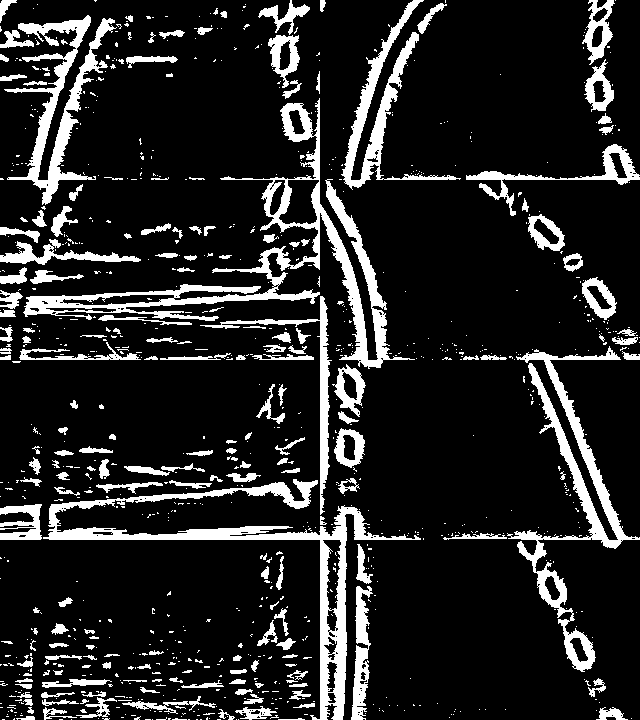

In [91]:
Image.fromarray(th0)

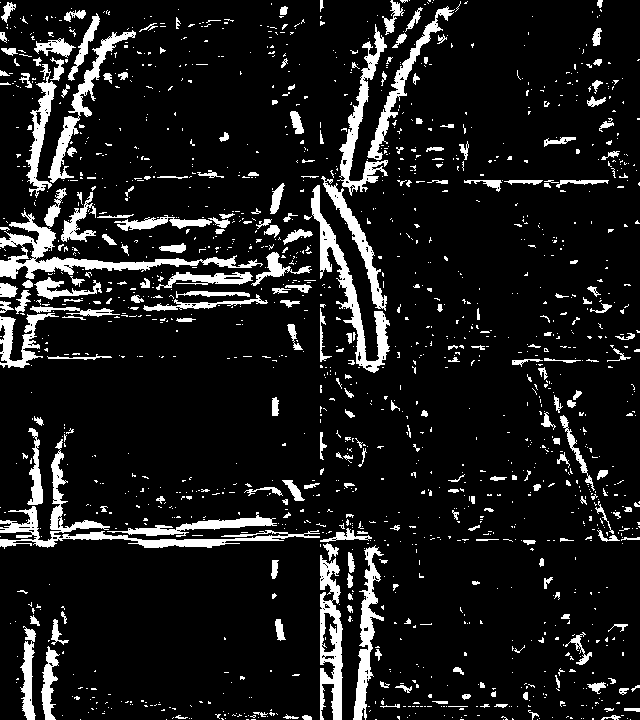

In [92]:
Image.fromarray(th1)

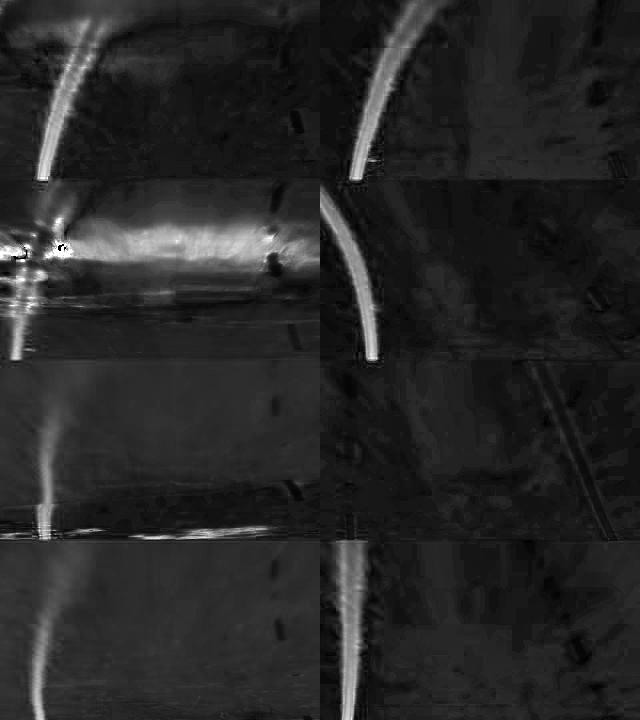

In [93]:
Image.fromarray(img_cvHSV[:,:,1])

In [95]:
ret,thresh2 = cv2.threshold(img_cvHSV[:,:,1],127,255,cv2.THRESH_BINARY)

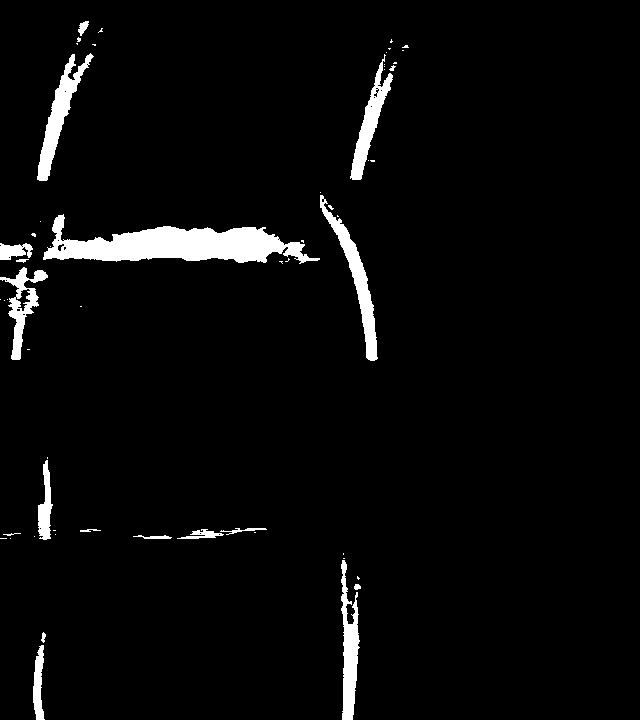

In [96]:
Image.fromarray(thresh2)

In [126]:
ret,thresh1 = cv2.threshold(img_cv[:,:,2],180,255,cv2.THRESH_BINARY)

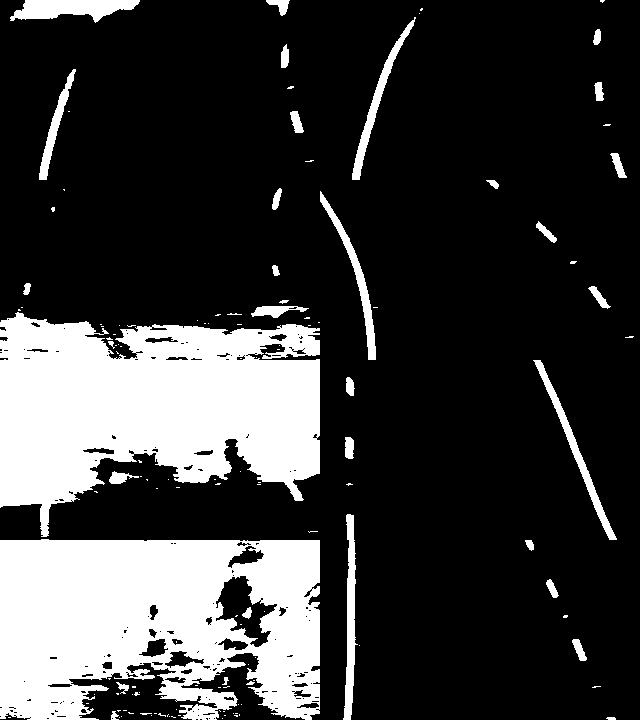

In [127]:
Image.fromarray(thresh1)

In [107]:
sobel_cv1 = cv2.Sobel(thresh1, cv2.CV_64F, 1, 0)
sobel_cv1 = np.abs(sobel_cv1)
sobel_cv1 = 255 * (sobel_cv1 / np.max(sobel_cv1))
sobel_cv1 = np.uint8(sobel_cv1)

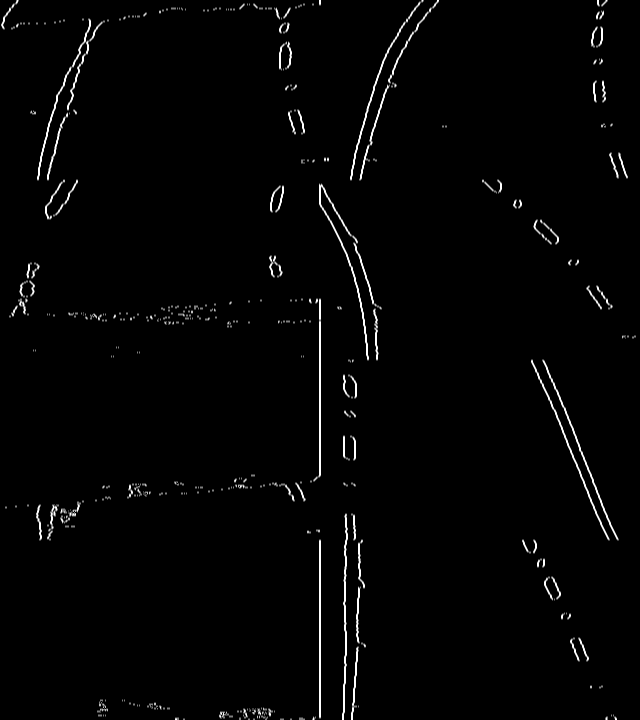

In [108]:
Image.fromarray(sobel_cv1)

In [109]:
sobel_cv2 = cv2.Sobel(thresh2, cv2.CV_64F, 1, 0)
sobel_cv2 = np.abs(sobel_cv2)
sobel_cv2 = 255 * (sobel_cv2 / np.max(sobel_cv2))
sobel_cv2 = np.uint8(sobel_cv2)

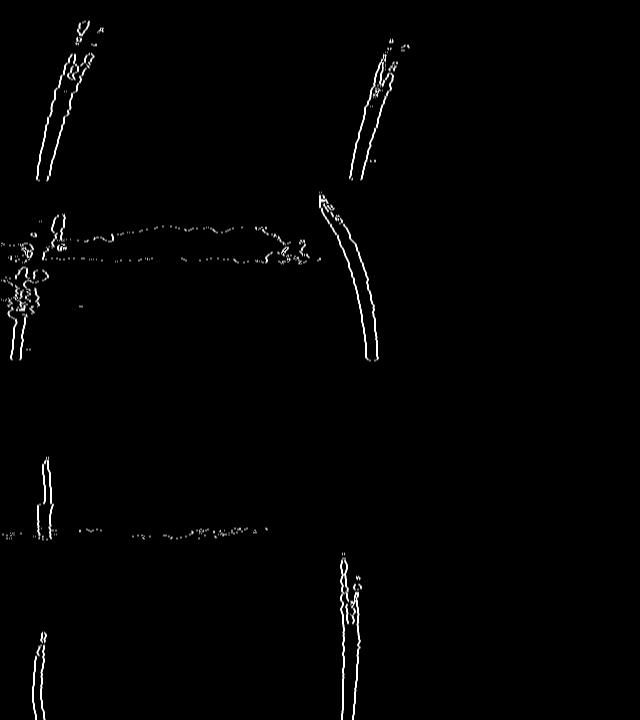

In [110]:
Image.fromarray(sobel_cv2)

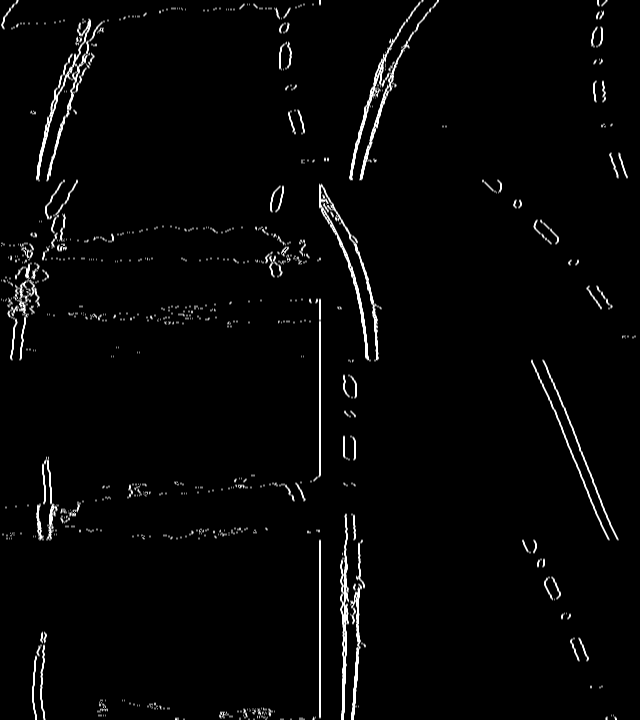

In [115]:
Image.fromarray(sobel_cv1 | sobel_cv2)

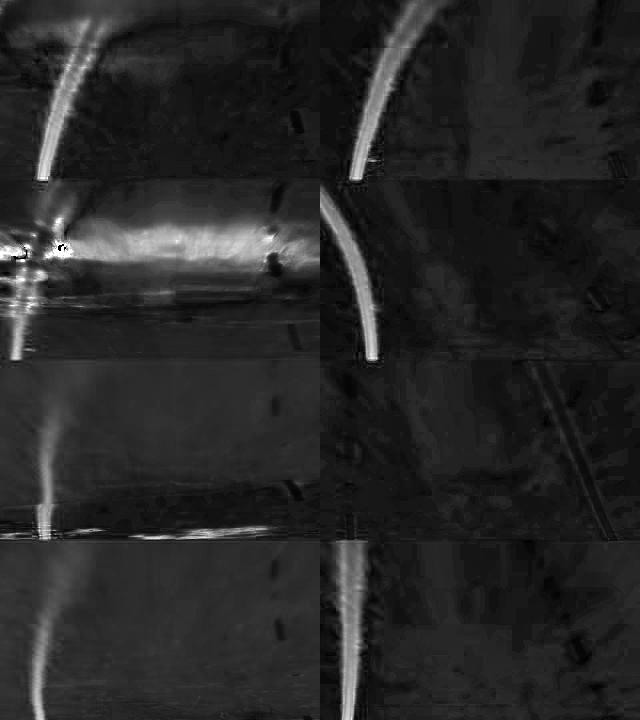

In [128]:
Image.fromarray(img_cvHSV[:,:,1])

In [133]:
sobel_cv2 = cv2.Sobel(img_cvHSV[:,:,1], cv2.CV_64F, 1, 0)
sobel_cv2 = np.abs(sobel_cv2)
sobel_cv2 = 255 * (sobel_cv2 / np.max(sobel_cv2))
sobel_cv2 = np.uint8(sobel_cv2)

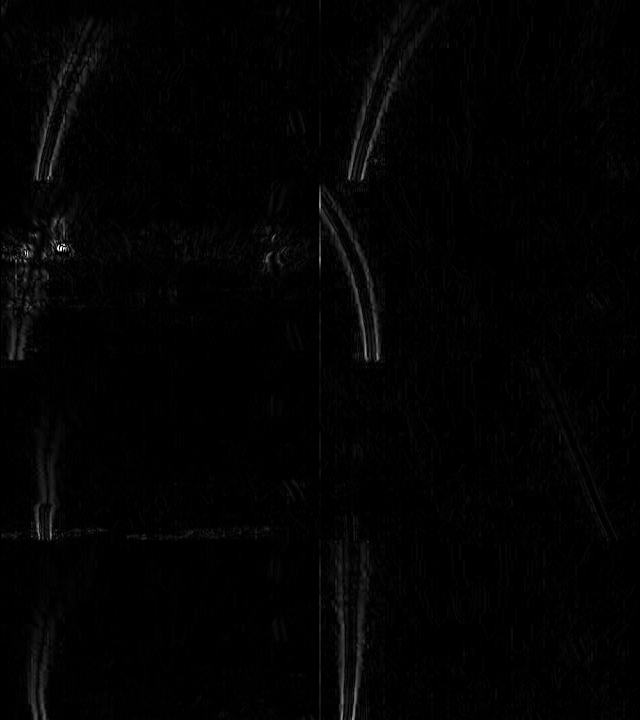

In [134]:
Image.fromarray(sobel_cv2)

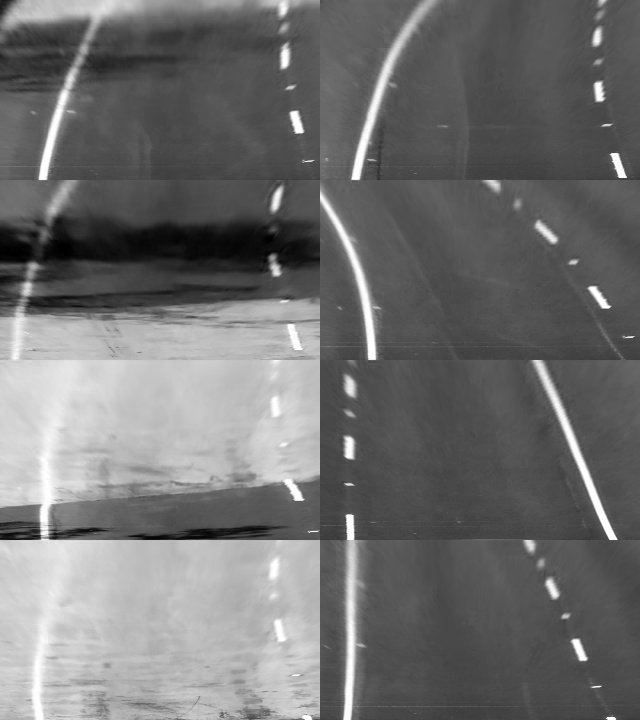

In [229]:
Image.fromarray(img_cv[:,:,2])

In [137]:
hsv_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)

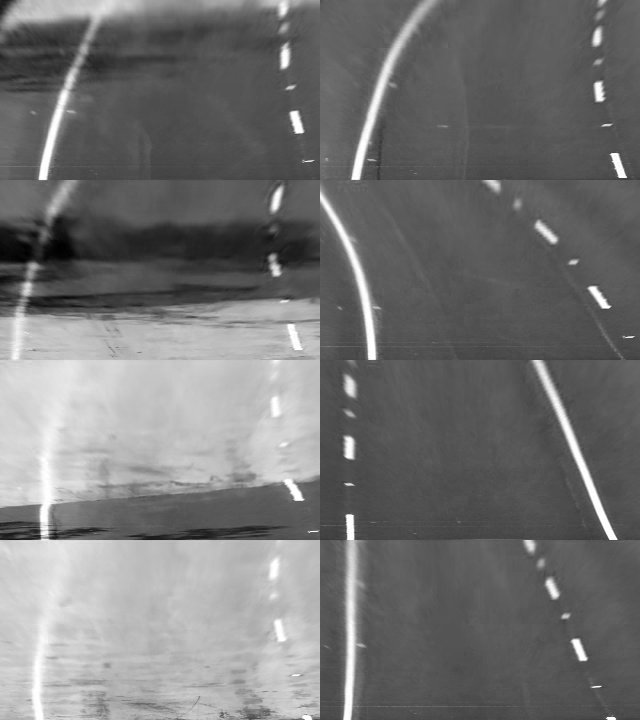

In [222]:
Image.fromarray(hsv_img[:,:,2])

In [150]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [201]:
pixel_colors = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB).reshape((np.shape(img_cv)[0]*np.shape(img_cv)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

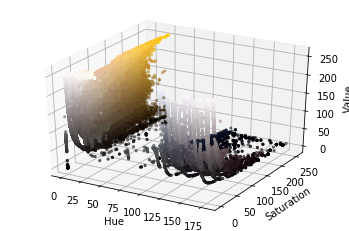

In [202]:
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [189]:
ret,thresh1 = cv2.threshold(hsv_img[:,:,2], 150,255,cv2.THRESH_BINARY)

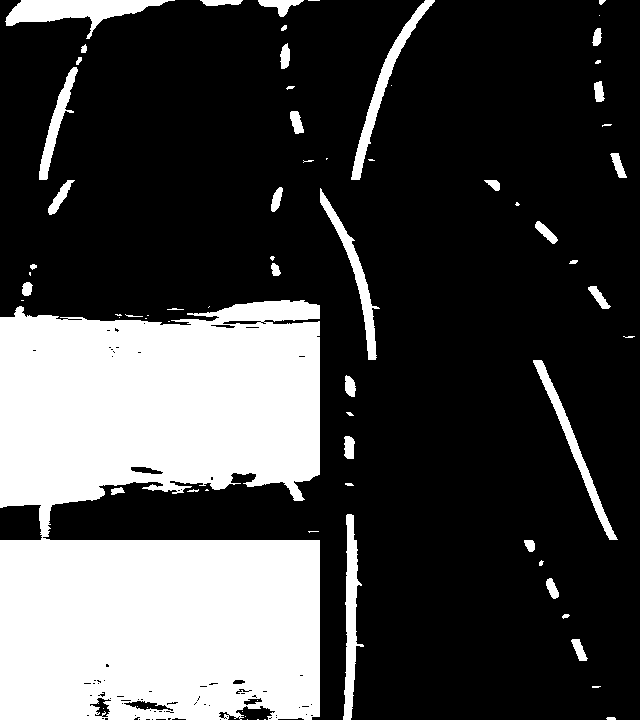

In [190]:
Image.fromarray(thresh1)

In [155]:
ret,thresh2 = cv2.threshold(hsv_img[:,:,0], 25,75,cv2.THRESH_BINARY)

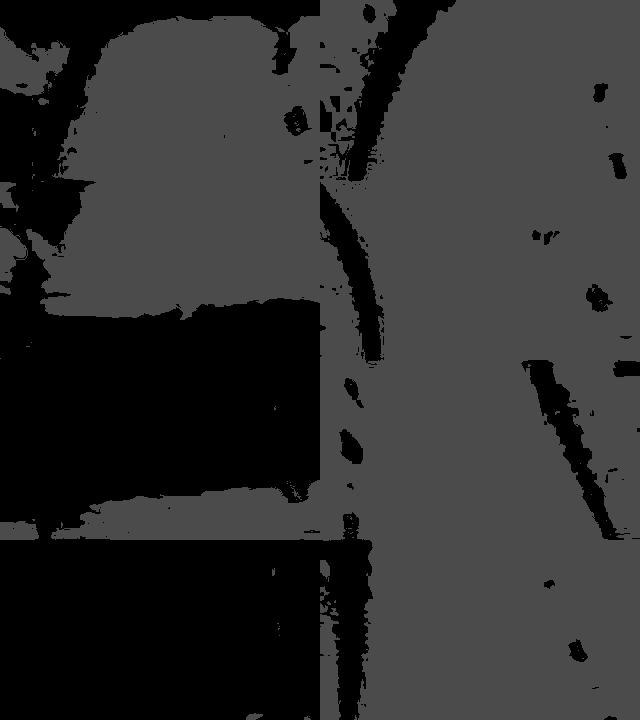

In [156]:
Image.fromarray(thresh2)

In [223]:
thr3=((hsv_img[:,:,0] > 10.0) & (hsv_img[:,:,0] < 25.0) & (hsv_img[:,:,2] > 200.)) * 255.0

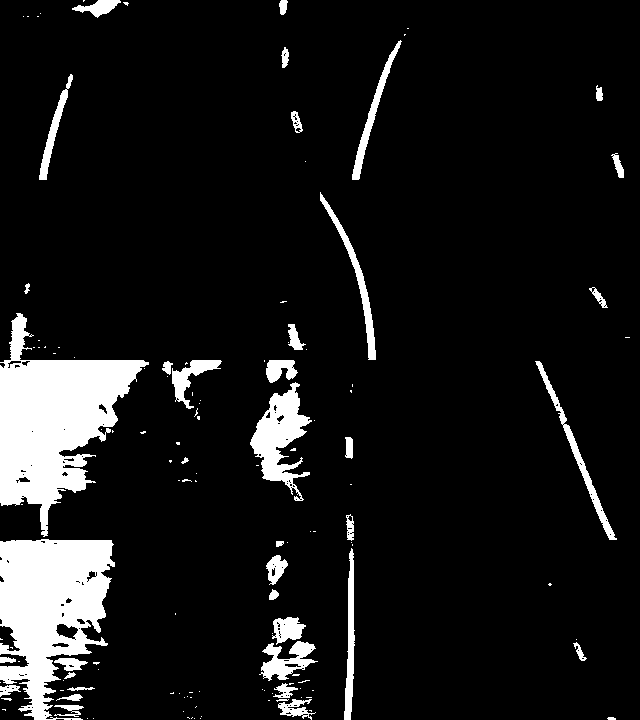

In [224]:
Image.fromarray(np.array(thr3, dtype=np.uint8))

In [219]:
light_orange = (25, 250, 250)
dark_orange = (18, 255, 255)

In [204]:
from matplotlib.colors import hsv_to_rgb

In [205]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

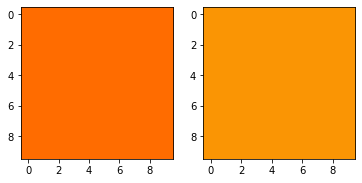

In [206]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

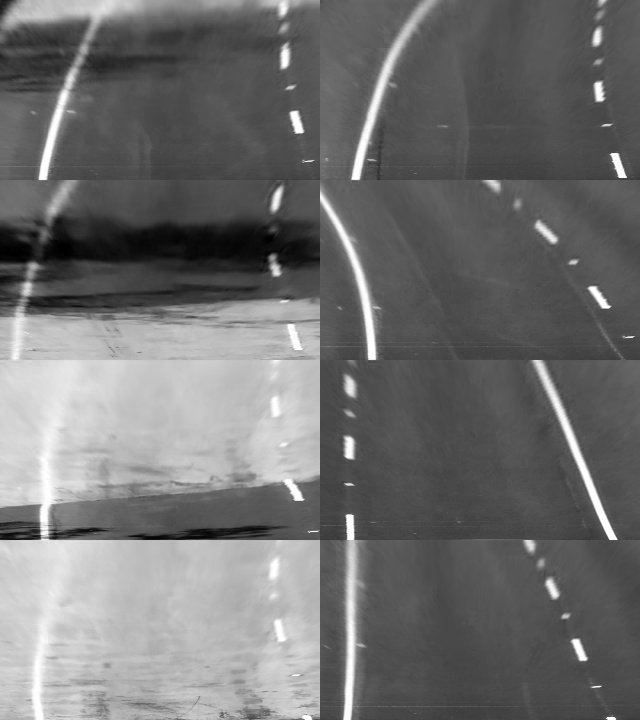

In [230]:
Image.fromarray(img_cv[:,:,2])

In [234]:
thr4=((img_cv[:,:,2] > 200.0) & (img_cv[:,:,2] < 255.0)) * 255.0

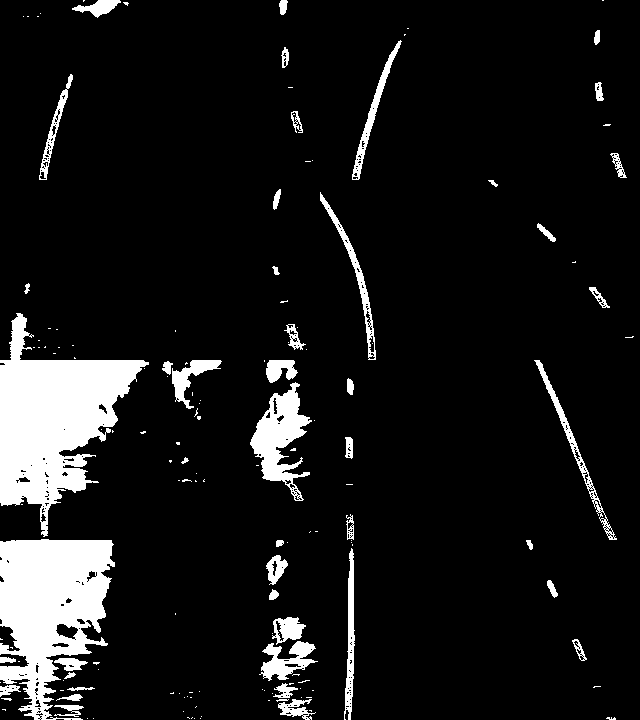

In [235]:
Image.fromarray(np.array(thr4, dtype=np.uint8))

In [276]:
th5 = cv2.adaptiveThreshold(img_cv[:,:,2],255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,41,-31)

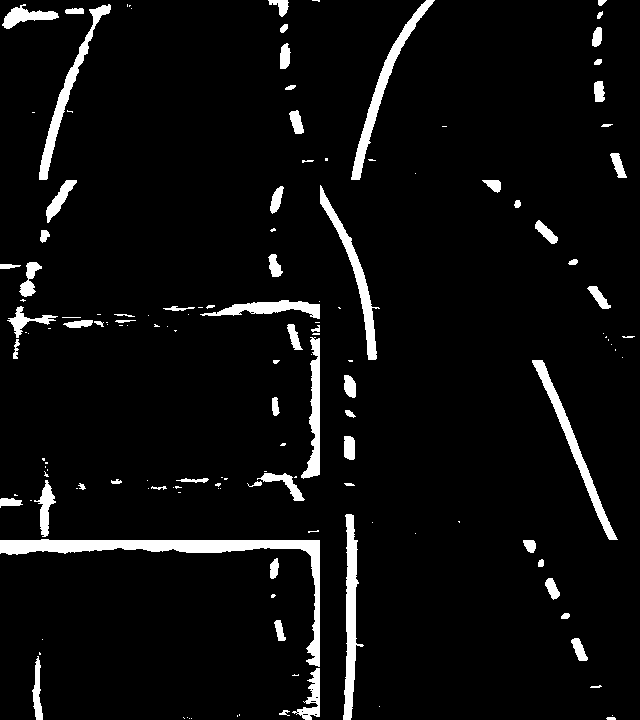

In [277]:
Image.fromarray(th5)

In [280]:
!ls test_images

straight_lines1.jpg test1.jpg           test3.jpg           test5.jpg
straight_lines2.jpg test2.jpg           test4.jpg           test6.jpg


In [510]:
p = 'warped/2.jpg'
test_cv = cv2.imread(p)
thr = cv2.adaptiveThreshold(test_cv[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,311,21)

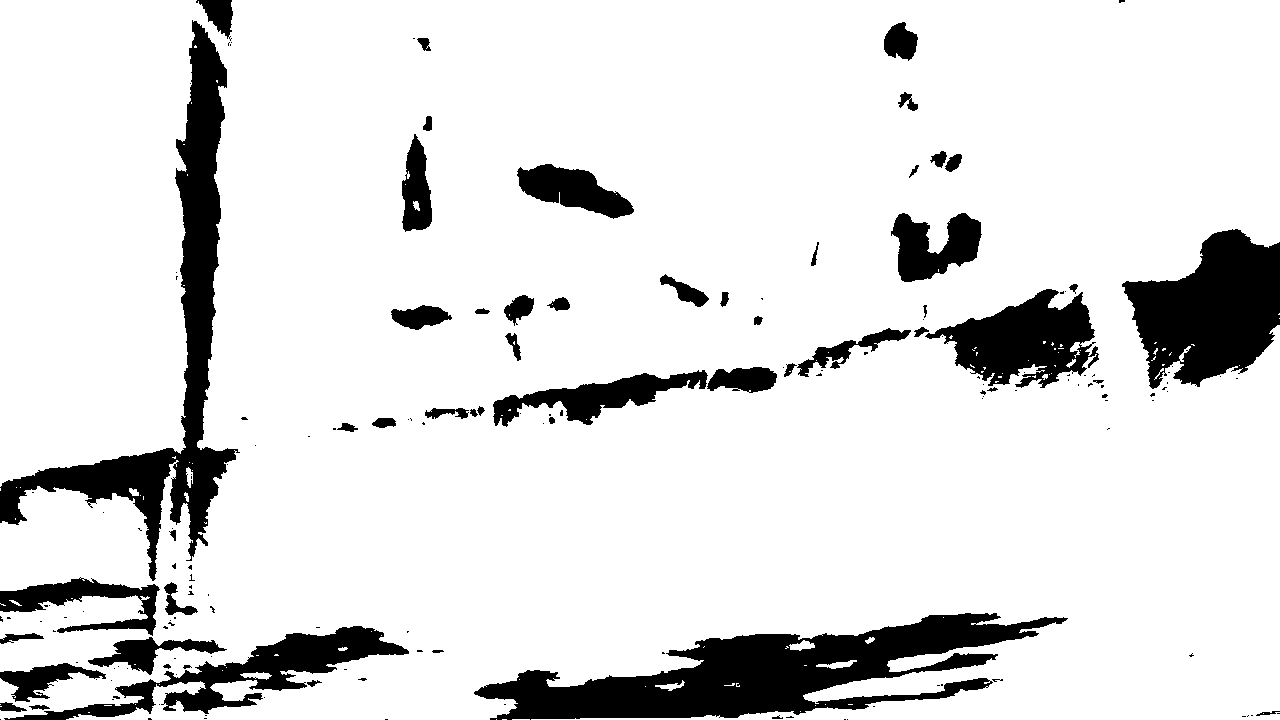

In [511]:
Image.fromarray(thr)

In [463]:
kernel = np.ones((5,5),np.uint8)

In [464]:
dilation = cv2.dilate(thr,kernel,iterations = 3)

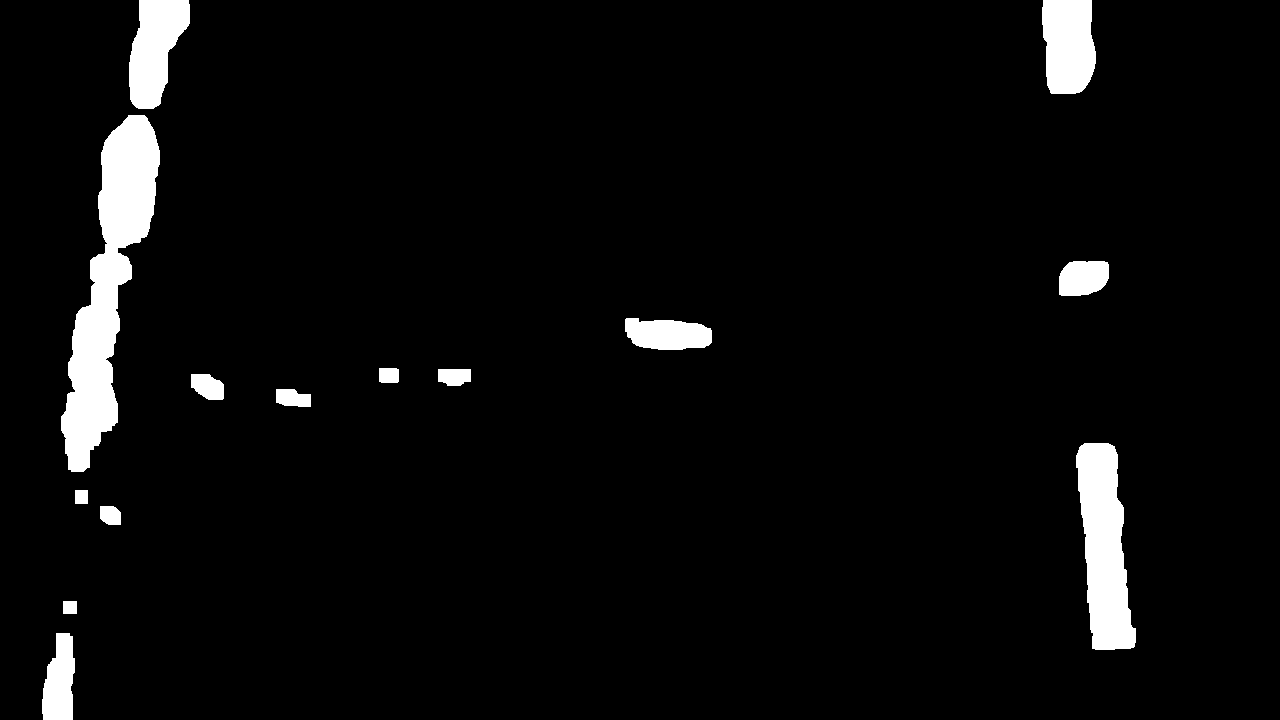

In [465]:
Image.fromarray(dilation)

In [466]:
erosion = cv2.erode(dilation,kernel,iterations = 4)

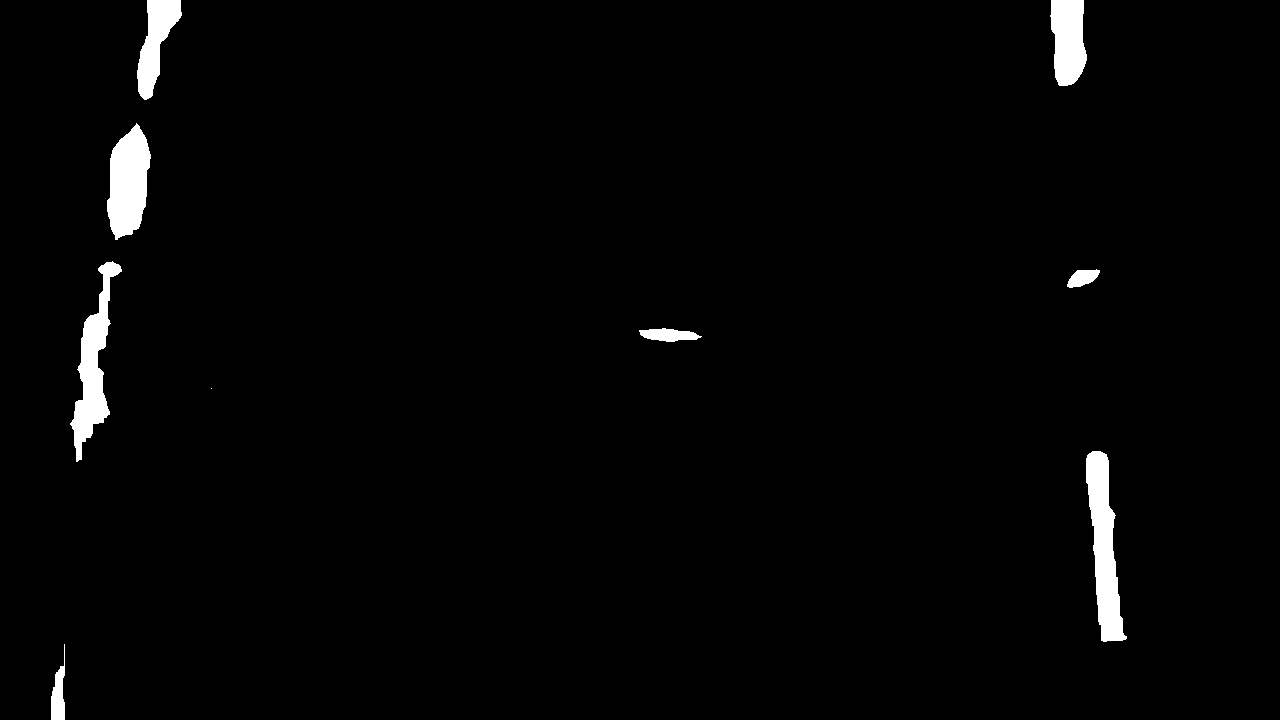

In [467]:
Image.fromarray(erosion)

In [475]:
def pipeline(img_cv):
    thr = cv2.adaptiveThreshold(img_cv[:,:,1],255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                                cv2.THRESH_BINARY,151,-41)
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(thr,kernel,iterations = 3)
    erosion = cv2.erode(dilation,kernel,iterations = 4)
    return erosion

In [476]:
p = 'warped/2.jpg'
test_cv = cv2.imread(p)

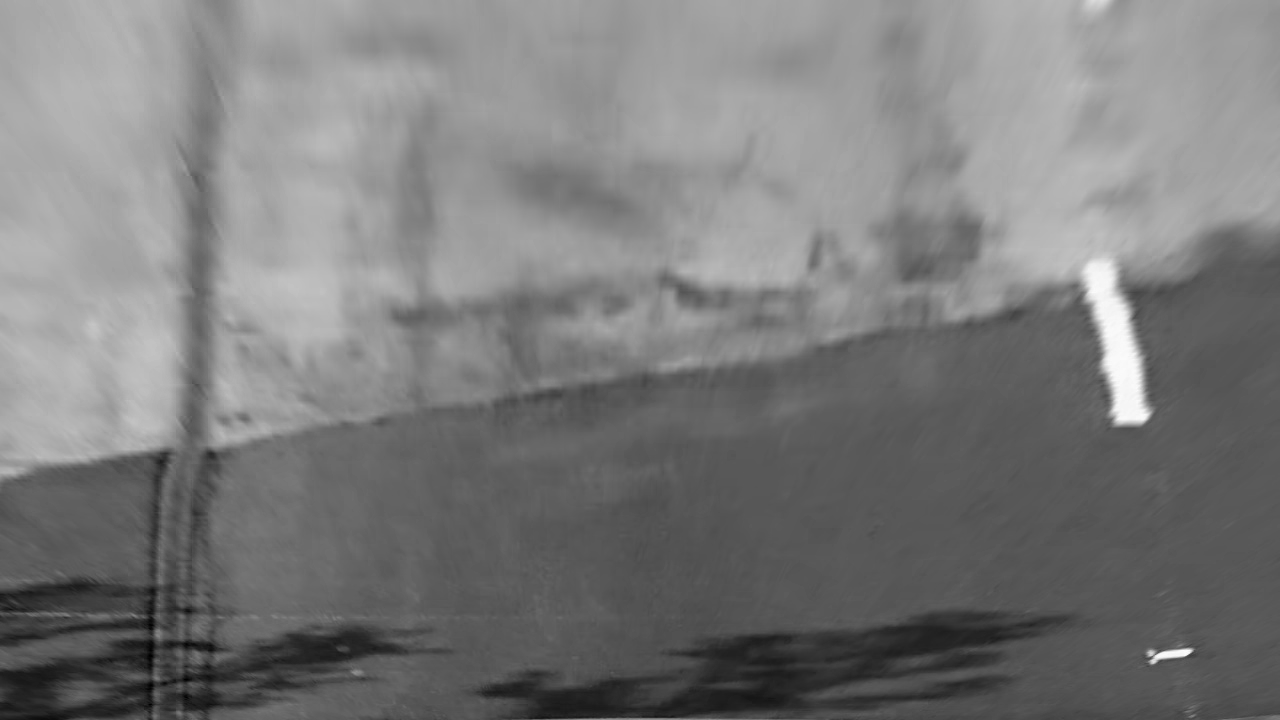

In [481]:
Image.fromarray(test_cv[:,:,0])

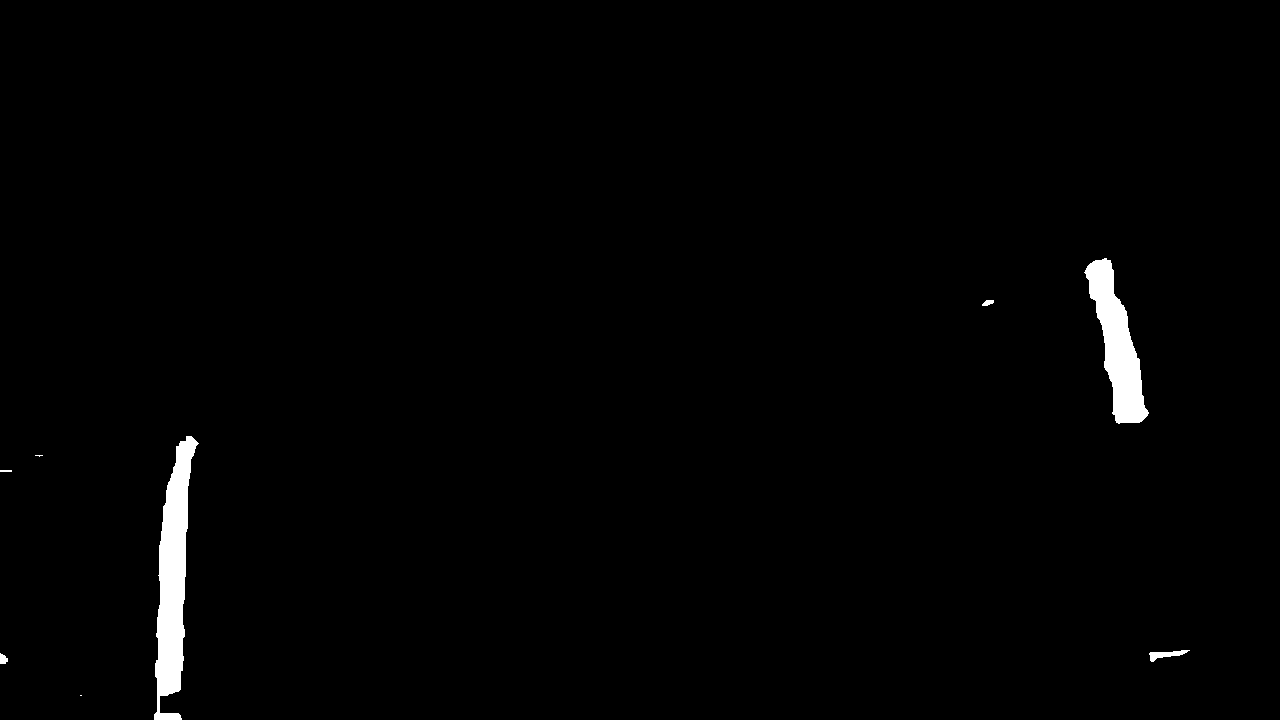

In [478]:
Image.fromarray(pipeline(test_cv))

In [512]:
import matplotlib.pyplot as plt

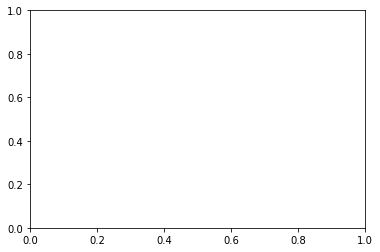

Text(0.5, 1.0, 'sin(x)')

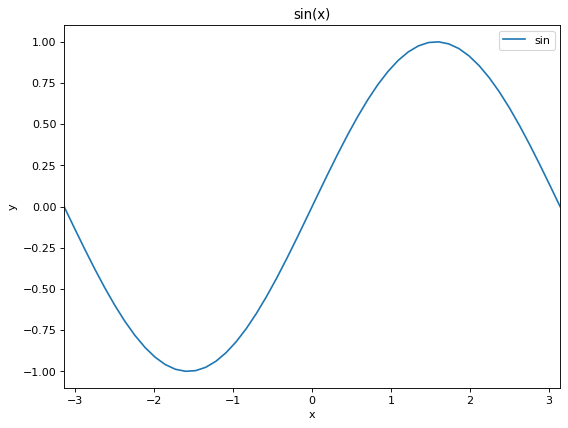

In [528]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111)

x = np.linspace(-np.pi, np.pi)

ax.set_xlim(-np.pi, np.pi)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.plot(x, np.sin(x), label="sin")

ax.legend()
ax.set_title("sin(x)")

In [535]:
def get_img_from_fig(fig, dpi=80):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [536]:
import io

In [537]:
plot_img_np = get_img_from_fig(fig)

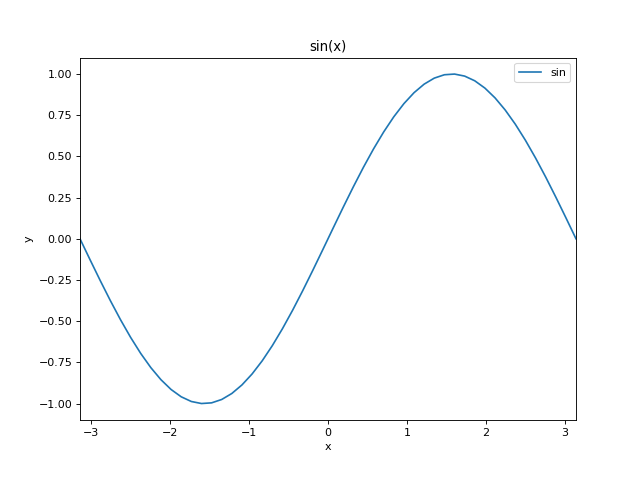

In [539]:
Image.fromarray(plot_img_np)

In [4]:
img = cv2.imread('prob/1006.jpg')

In [6]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

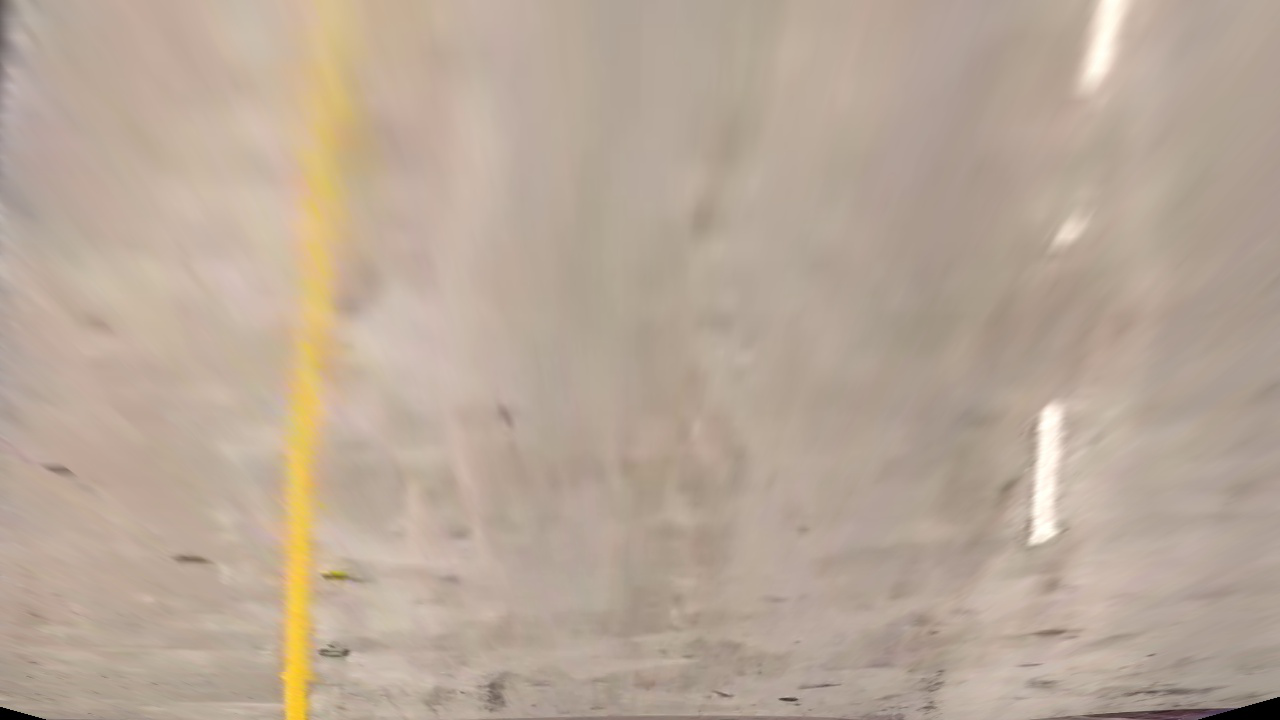

In [5]:
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

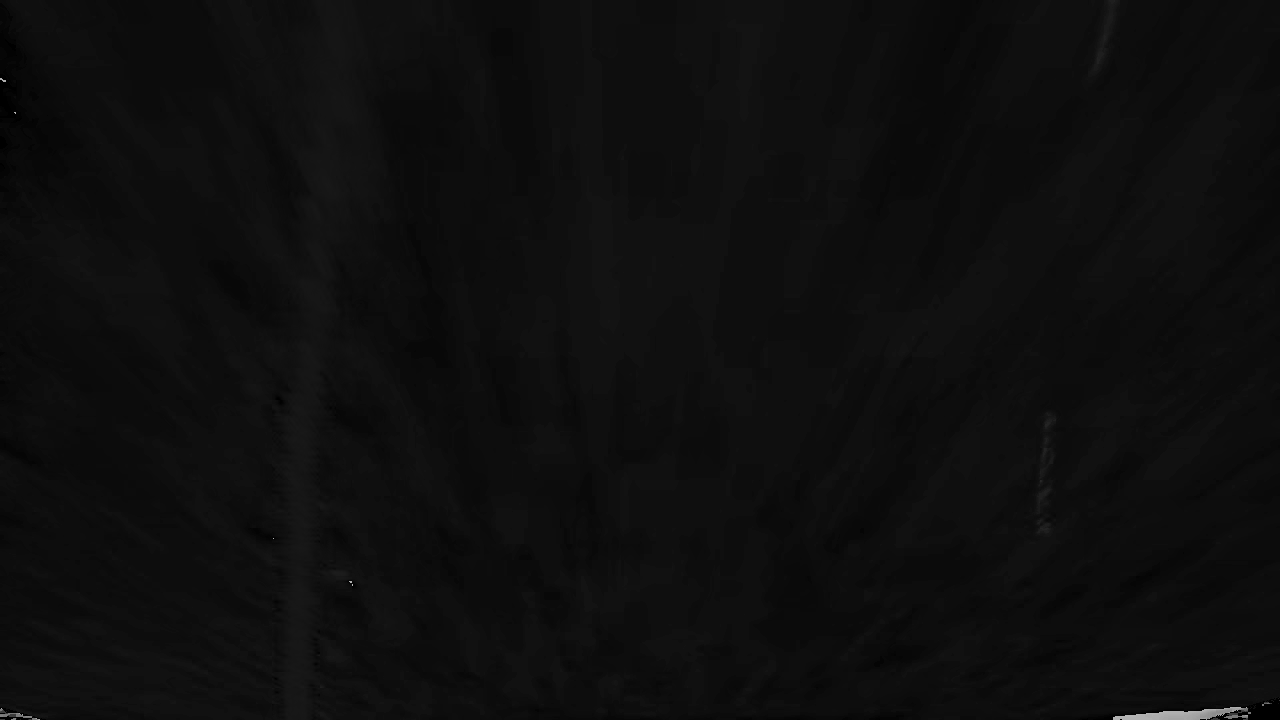

In [7]:
Image.fromarray(img_hsv[:,:,0])

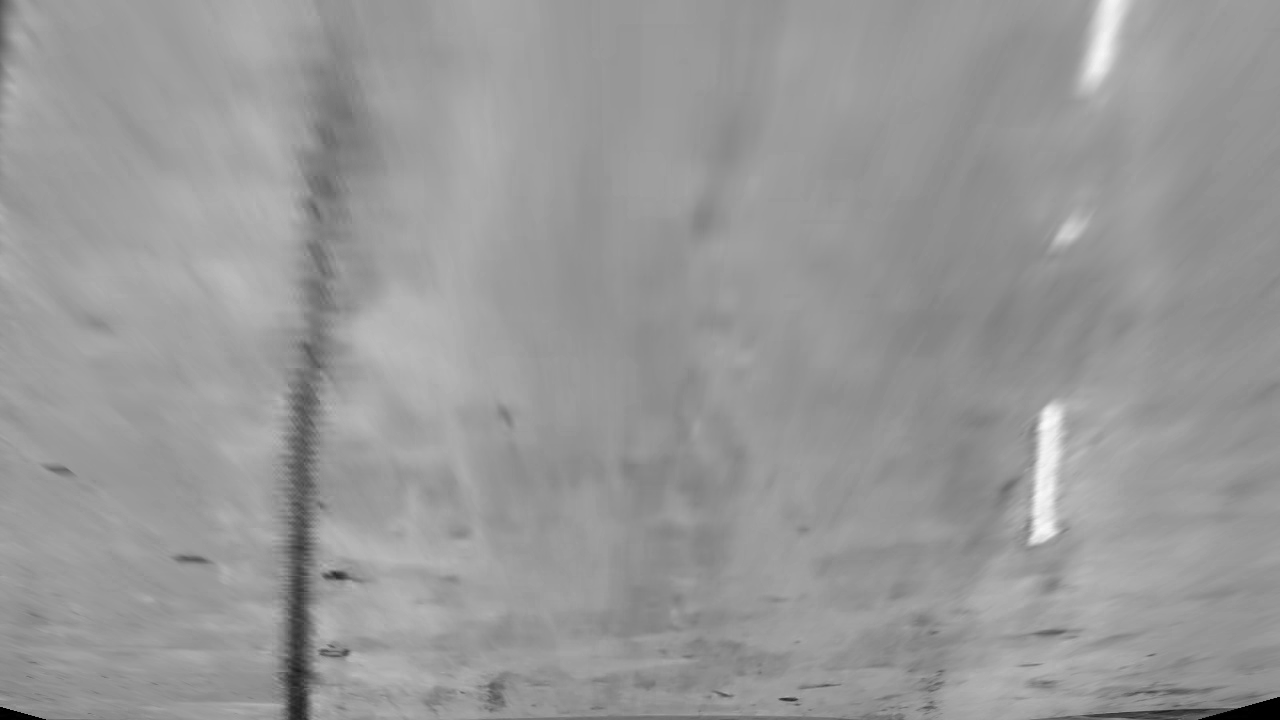

In [11]:
Image.fromarray(img[:,:,0])

In [24]:
img_inv = cv2.bitwise_not(img[:,:,0])

In [22]:
img_inv[img_inv < 120] = 0

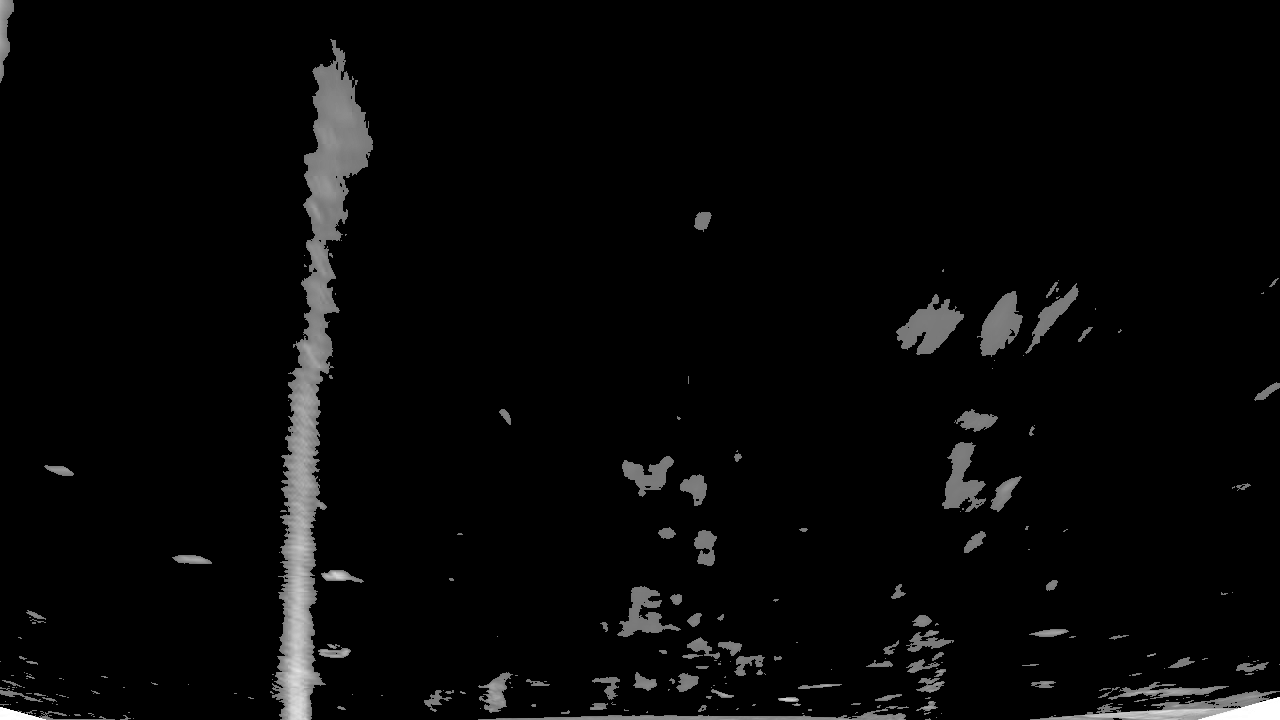

In [23]:
Image.fromarray(img_inv)

In [25]:
thr = cv2.adaptiveThreshold(img_inv,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                                cv2.THRESH_BINARY,151,-21)

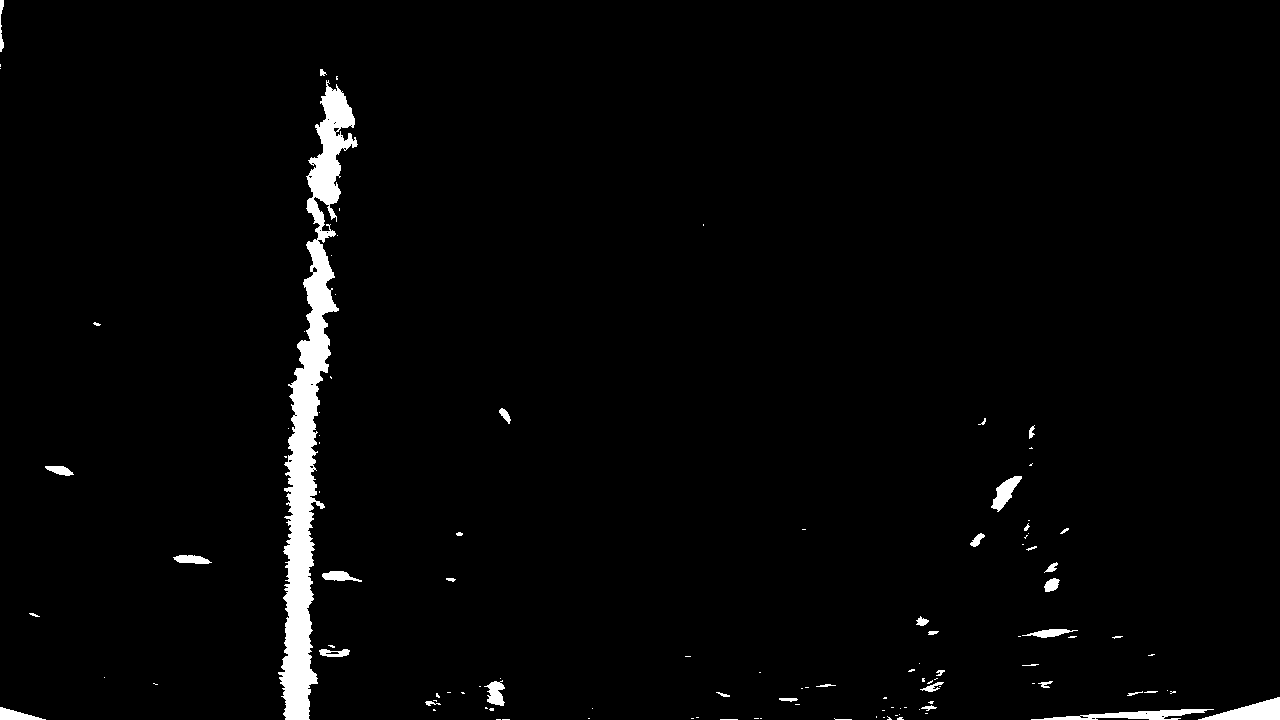

In [26]:
Image.fromarray(thr)

In [127]:
img = cv2.imread('prob/1030.jpg')

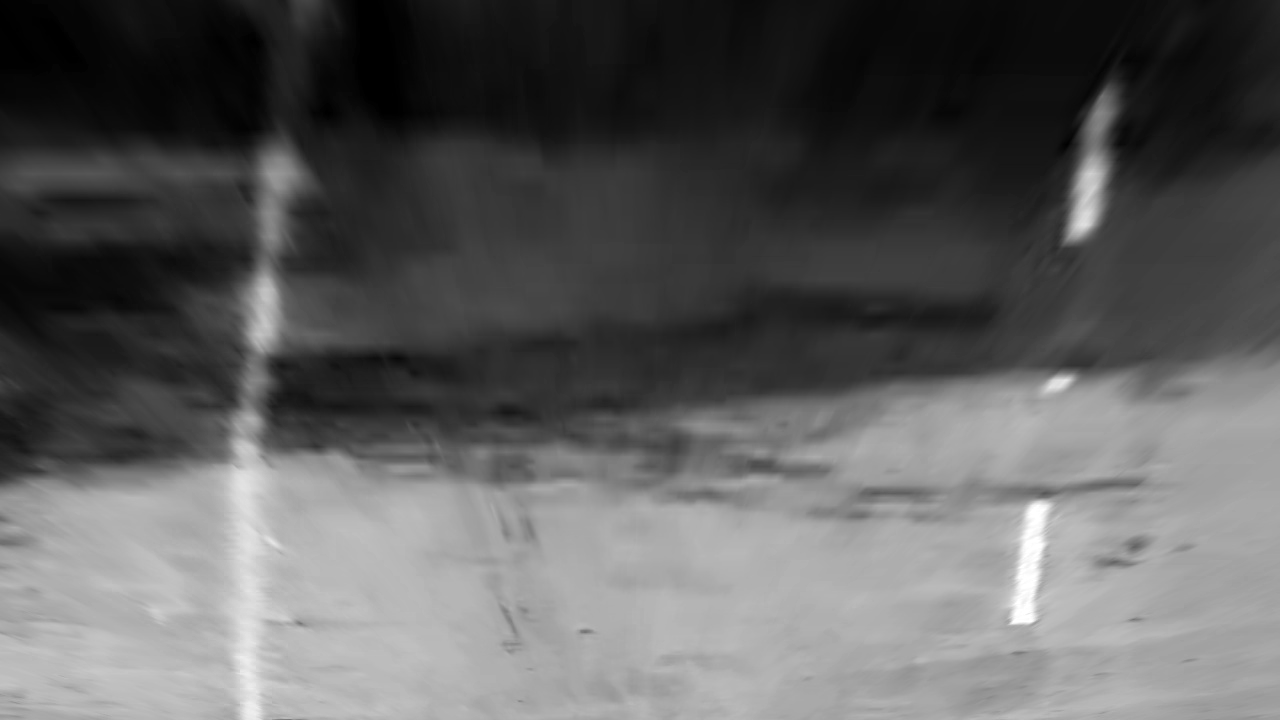

In [130]:
Image.fromarray(img[:,:,2])

In [131]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

In [145]:
img_hls[(img_hls[:,:,0] > 28)|(img_hls[:,:,0] <18)]=0

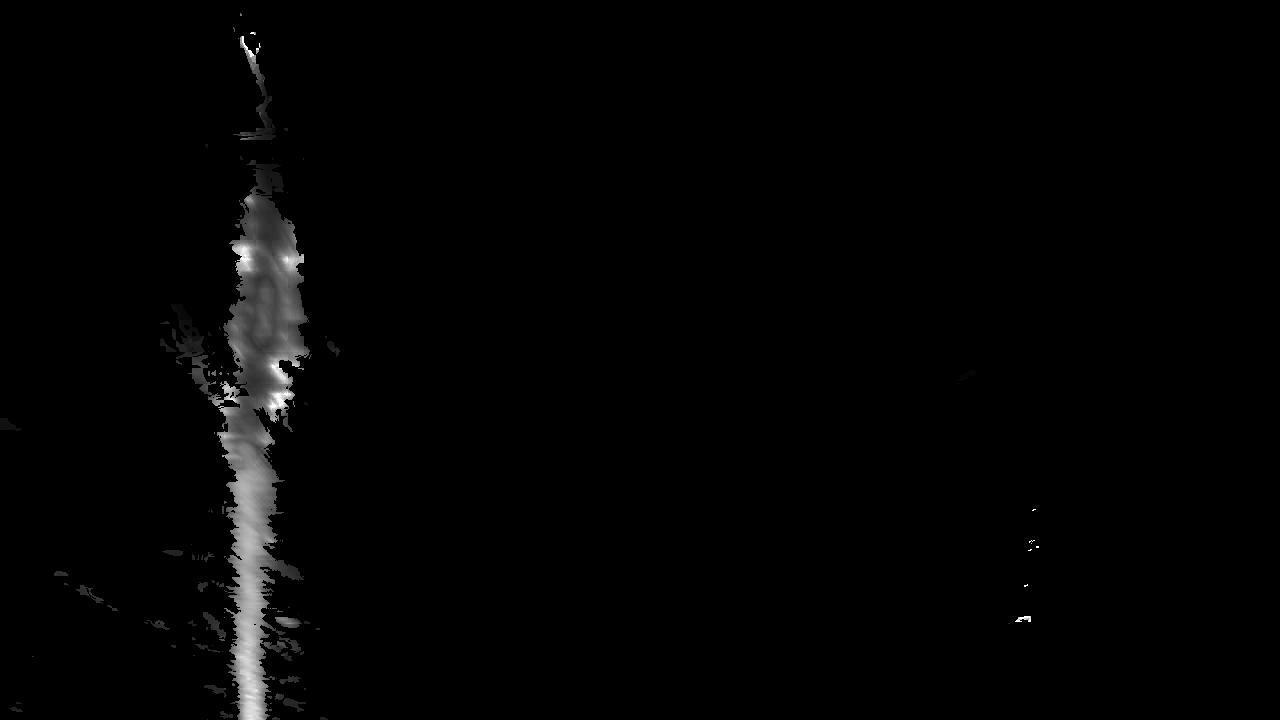

In [146]:
Image.fromarray(img_hls[:,:,2])

In [116]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [117]:
img_hsv[:,:,0][(img_hsv[:,:,0] > 100)|(img_hsv[:,:,0] < 20)] = 0

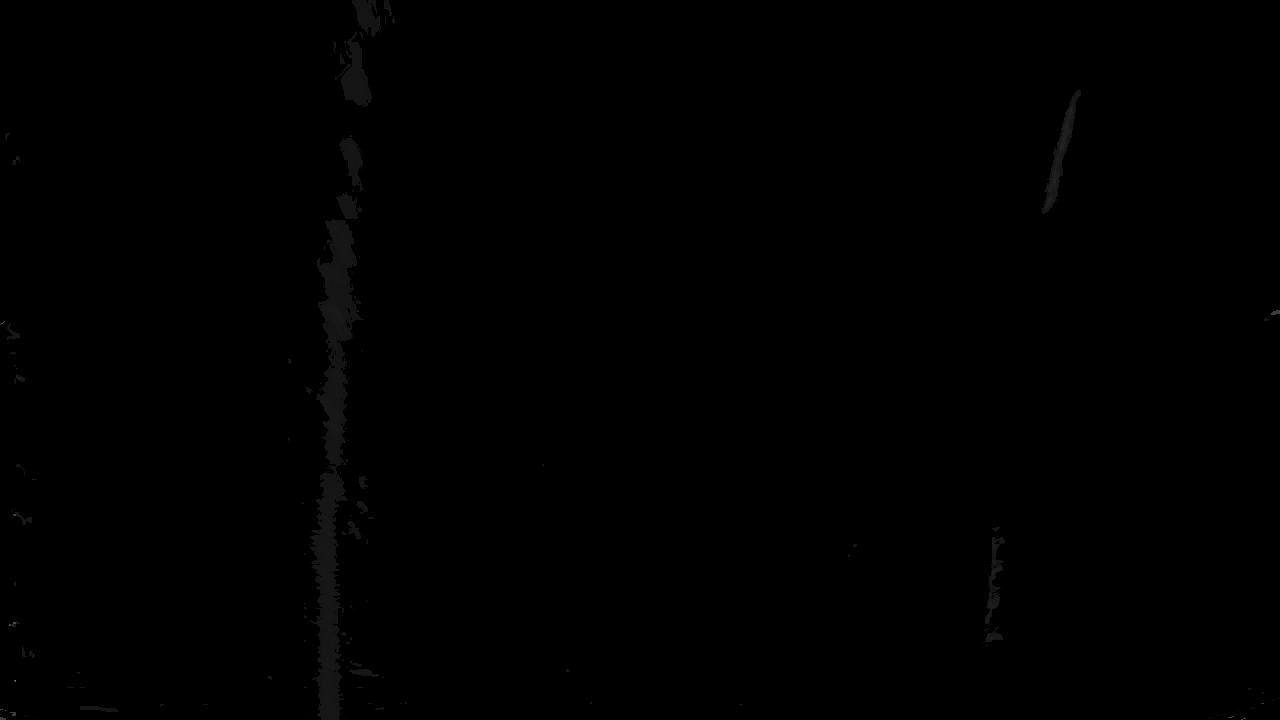

In [118]:
Image.fromarray(img_hsv[:,:,0])

In [101]:
thr1 = cv2.adaptiveThreshold(img_hsv[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                                cv2.THRESH_BINARY,141,-2)

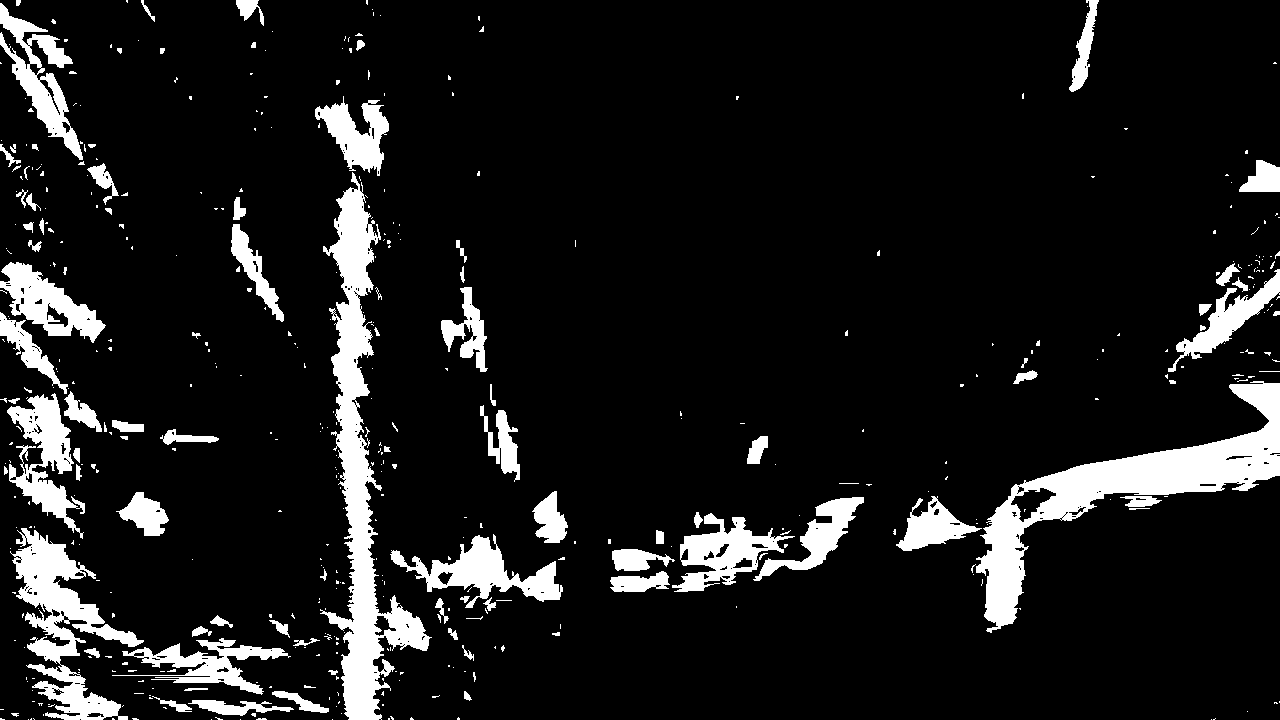

In [102]:
Image.fromarray(thr1)

In [71]:
thr = np.zeros(img_hsv.shape[:-1], dtype=np.uint8)

In [72]:
thr[(img_hsv[:,:,0]>21)&(img_hsv[:,:,0]<24)] = 255

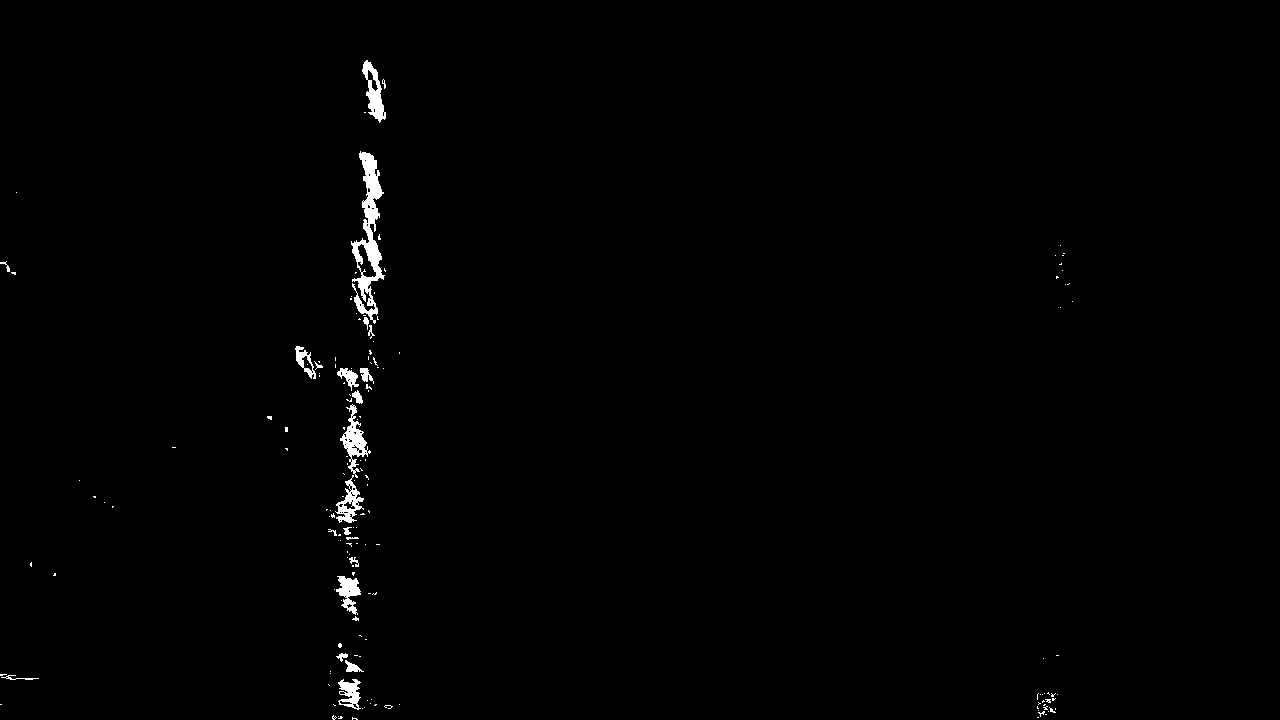

In [73]:
Image.fromarray(thr)

In [83]:
img_hsv[:,:,2][0][50]

159

In [84]:
thr3 = np.zeros(img_hsv.shape[:-1], dtype=np.uint8)
thr3[(img_hsv[:,:,2]>50)] = 255

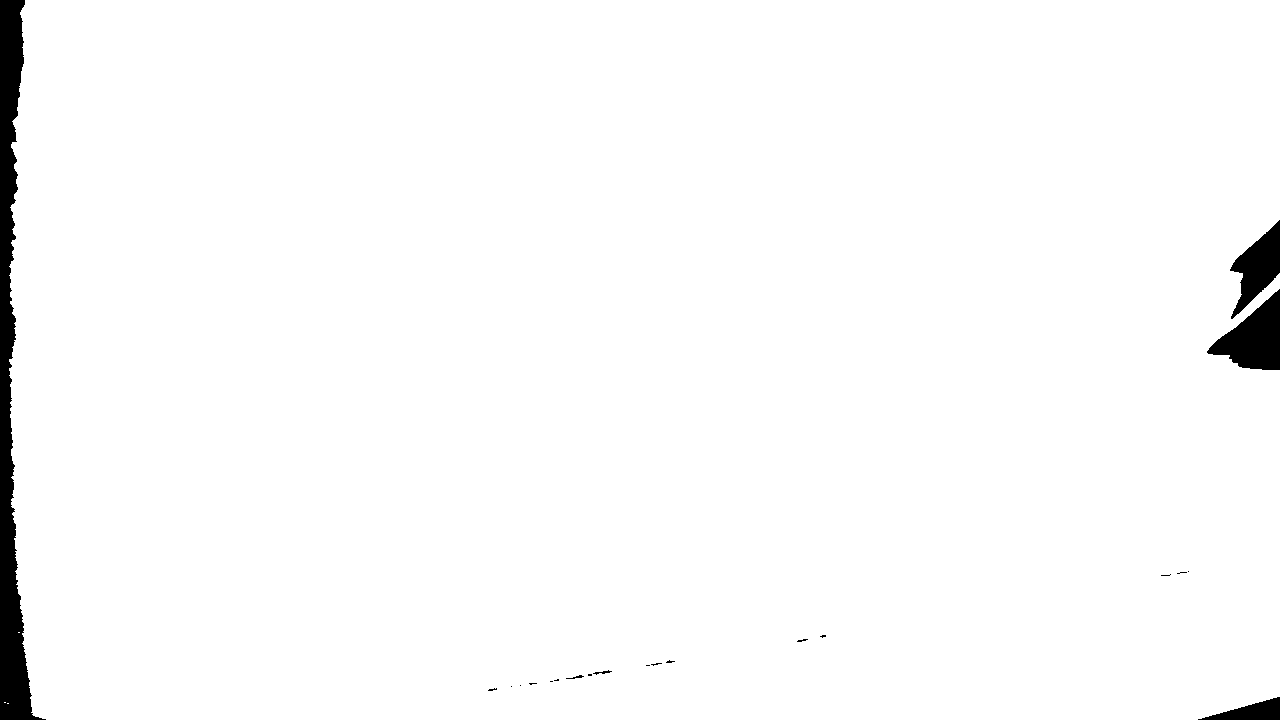

In [85]:
Image.fromarray(thr3)